In [ ]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/15
422/422 [==============================] - 48s 111ms/step - loss: 0.3644 - accuracy: 0.8906 - val_loss: 0.0829 - val_accuracy: 0.9767
Epoch 2/15
422/422 [==============================] - 41s 96ms/step - loss: 0.1128 - accuracy: 0.9653 - val_loss: 0.0597 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0856 - accuracy: 0.9749 - val_loss: 0.0497 - val_accuracy: 0.9863
Epoch 4/15
422/422 [==============================] - 41s 96ms/step - loss: 0.0698 - accuracy: 0.9777 - val_loss: 0.0462 - val_accuracy: 0.9863
Epoch 5/15
422/422 [==============================] - 40s 96ms/step - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.0484 - val_accuracy: 0.9863
Epoch 6/15
422/422 [==============================] - 40s 96ms/step - loss: 0.0566 - accuracy: 0.9828 - val_loss: 0.0341 - val_accuracy: 0.9913
Epoch 7/15
422/422 [==============================] - 40s 96ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0331 - val_accurac

In [ ]:
def recognize_number(input_image):
    # делим картинку с числом на картинки с цифрами
    digit_images = np.split(input_image, input_image.shape[1] / 28, axis=1)
    digit_images = np.array(digit_images)

    # прогоняем картинки с цифрами через модель
    prediction_result = model.predict(digit_images)

    # обрабатываем результат
    ans = ""
    for case in np.split(prediction_result, len(digit_images)):
        predicted = np.argmax(case)
        ans += str(predicted)

    print("Я думаю, что это число:", ans)


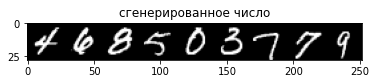

Я думаю, что это число: 468503779


In [ ]:
def generate_input_image(possible_digits=x_test,
                         input_length=1):
    selected_digit_images = [possible_digits[random.randint(0, len(possible_digits))] for _ in range(input_length)]
    concatenated = np.concatenate(selected_digit_images, axis=1).squeeze()

    # смотрим сгенерированное число
    plt.title('сгенерированное число')
    plt.imshow(concatenated, cmap='gray')
    plt.show()

    return concatenated

input_image = generate_input_image(input_length=9)

recognize_number(input_image)